In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import timedelta

## Preprocess Flash Count Data

In [2]:
month = "08"
year = "2019"
filename = '/aosc/eos20/djallen/data/lightning/glm/2019/GLMmax_hrly_count_f.nominalq.UT.t201908.r180W-30W_50S-50N.nc'

ds = xr.open_dataset(
    filename, 
    mask_and_scale=True)

datetime_range = pd.date_range(
    start=f"{year}-{month}-01", 
    freq="1H", 
    periods=len(ds.Days)*len(ds.Hours)
)

datetime_range = datetime_range + timedelta(hours=1)

newdscount = ds.where(
    ds['flashes']!=1.e+15,np.nan).assign_coords(
    coords=dict(
        Longitudes=ds.longitude,
        Latitudes=ds.latitude,
        Datetime=datetime_range,
    )
).drop_vars(
    names=["longitude","latitude","time"]
).stack(Datetime=["Days","Hours"])["flashes"].assign_attrs(
    missing_value=np.nan).to_dataset(
    name="flashes").drop_vars("Datetime").assign_coords(
    coords=dict(
        Datetime=datetime_range,
    )
)

newdscount

/tmp/ipykernel_1860432/3226381626.py:28: DeprecationWarning: Deleting a single level of a MultiIndex is deprecated. Previously, this deleted all levels of a MultiIndex. Please also drop the following variables: {'Days', 'Hours'} to avoid an error in the future.
  name="flashes").drop_vars("Datetime").assign_coords(


<xarray.Dataset>
Dimensions:     (Longitudes: 300, Latitudes: 200, Datetime: 744)
Coordinates:
  * Longitudes  (Longitudes) float32 -179.8 -179.2 -178.8 ... -30.75 -30.25
  * Latitudes   (Latitudes) float32 -49.75 -49.25 -48.75 ... 48.75 49.25 49.75
  * Datetime    (Datetime) datetime64[ns] 2019-08-01T01:00:00 ... 2019-09-01
Data variables:
    flashes     (Latitudes, Longitudes, Datetime) float32 0.0 0.0 ... 0.0 0.0

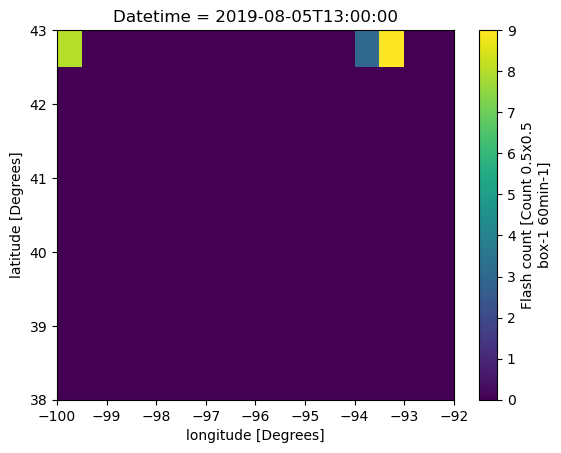

In [3]:
newdscount['flashes'].sel(
    Latitudes=slice(38,43),Longitudes=slice(-100,-92),Datetime='2019-08-05T13:00:00.000000000').plot()

In [4]:
tmp_array1 = newdscount['flashes'].sel(
    Latitudes=slice(38,43),
    Longitudes=slice(-100,-92),
    Datetime=slice('2019-08-15T14:00:00.000000000','2019-08-15T20:00:00.000000000'))

In [5]:
#print(tmp_array1)
#tmp_array1.sel(Datetime='2019-07-08T18:00:00.000000000').plot()

Text(0.5, 1.0, 'Hourly Flash Count 08/15/2019 14z-20z')

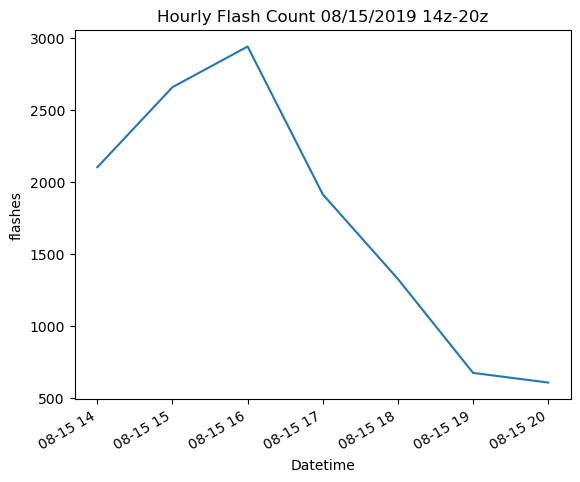

In [6]:
xr.where(tmp_array1==0.0,np.nan,tmp_array1).sum(["Latitudes","Longitudes"],skipna=True).plot()

plt.title('Hourly Flash Count 08/15/2019 14z-20z')


## Preprocess Group Count Data

In [7]:
month = "08"
year = "2019"
filename = '/aosc/eos20/djallen/data/lightning/glm/2019/GLMmax_hrly_count_g.nominalq.UT.t201908.r180W-30W_50S-50N.nc'

ds = xr.open_dataset(
    filename, 
    mask_and_scale=True)

datetime_range = pd.date_range(
    start=f"{year}-{month}-01", 
    freq="1H", 
    periods=len(ds.Days)*len(ds.Hours)
)

datetime_range = datetime_range + timedelta(hours=1)

newdscountgr = ds.where(
    ds['groups']!=1.e+15,np.nan).assign_coords(
    coords=dict(
        Longitudes=ds.longitude,
        Latitudes=ds.latitude,
        Datetime=datetime_range,
    )
).drop_vars(
    names=["longitude","latitude","time"]
).stack(Datetime=["Days","Hours"])["groups"].assign_attrs(
    missing_value=np.nan).to_dataset(
    name="groups").drop_vars("Datetime").assign_coords(
    coords=dict(
        Datetime=datetime_range,
    )
)

newdscountgr

/tmp/ipykernel_1860432/1186099920.py:28: DeprecationWarning: Deleting a single level of a MultiIndex is deprecated. Previously, this deleted all levels of a MultiIndex. Please also drop the following variables: {'Days', 'Hours'} to avoid an error in the future.
  name="groups").drop_vars("Datetime").assign_coords(


<xarray.Dataset>
Dimensions:     (Longitudes: 300, Latitudes: 200, Datetime: 744)
Coordinates:
  * Longitudes  (Longitudes) float32 -179.8 -179.2 -178.8 ... -30.75 -30.25
  * Latitudes   (Latitudes) float32 -49.75 -49.25 -48.75 ... 48.75 49.25 49.75
  * Datetime    (Datetime) datetime64[ns] 2019-08-01T01:00:00 ... 2019-09-01
Data variables:
    groups      (Latitudes, Longitudes, Datetime) float32 0.0 0.0 ... 0.0 0.0

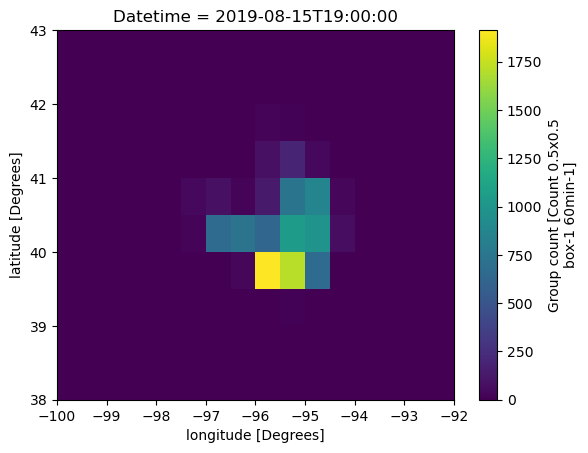

In [8]:
newdscountgr['groups'].sel(
    Latitudes=slice(38,43),Longitudes=slice(-100,-92),Datetime='2019-08-15T19:00:00.000000000').plot()

In [9]:
tmp_array2 = newdscountgr['groups'].sel(
    Latitudes=slice(38,43),
    Longitudes=slice(-100,-92),
    Datetime=slice('2019-08-15T14:00:00.000000000','2019-08-15T20:00:00.000000000'))

Text(0.5, 1.0, 'Hourly Group Count 08/15/2019 14z-20z')

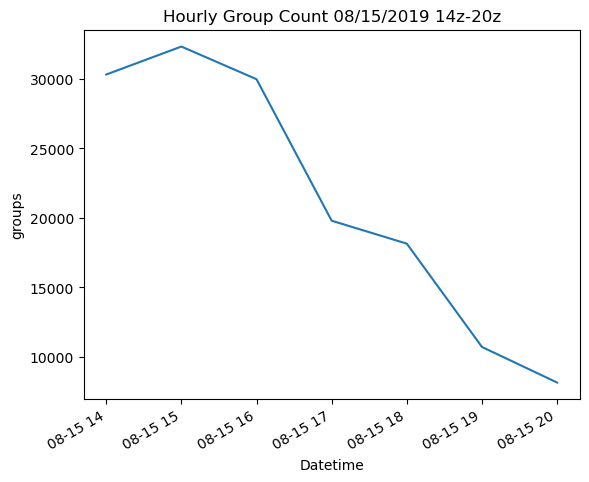

In [10]:
xr.where(tmp_array2==0.0,np.nan,tmp_array2).sum(["Latitudes","Longitudes"],skipna=True).plot()

plt.title('Hourly Group Count 08/15/2019 14z-20z')

## Calculate Multiplicity

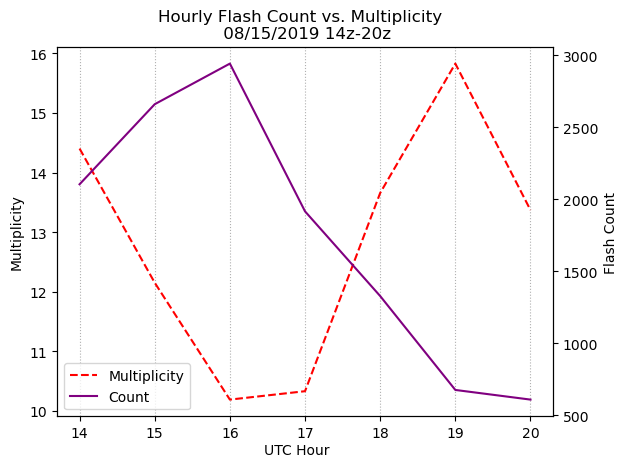

In [11]:
tmp_array1 = newdscount['flashes'].sel(
    Latitudes=slice(38,43),
    Longitudes=slice(-100,-92),
    Datetime=slice('2019-08-15T14:00:00.000000000','2019-08-15T20:00:00.000000000'))
tmp1 = xr.where(tmp_array1==0.0,np.nan,tmp_array1).sum(["Longitudes","Latitudes"],skipna=True)

tmp_array2 = newdscountgr['groups'].sel(
    Latitudes=slice(38,43),
    Longitudes=slice(-100,-92),
    Datetime=slice('2019-08-15T14:00:00.000000000','2019-08-15T20:00:00.000000000'))
tmp2 = xr.where(tmp_array2==0.0,np.nan,tmp_array2).sum(["Longitudes","Latitudes"],skipna=True)

#multiplicity
mult = tmp2 / tmp1

fig, ax1 = plt.subplots()
 
ls1, = ax1.plot(mult, color ='red',linestyle='--')
ax2 = ax1.twinx()
ls2, = ax2.plot(tmp1, color='purple')

#ax1.set_ylim(ymin=0,ymax=100)
#ax2.set_ylim(ymin=0,ymax=10000)
#ax3 = "Datetime"

ax1.set_ylabel('Multiplicity')
ax2.set_ylabel('Flash Count')

#labels the x-axis
fig.text(0.5, 0.04, 'UTC Hour', ha='center', va='center')

ax1.legend([ls1,ls2],['Multiplicity','Count'], loc='lower left')

ax1.set_title('Hourly Flash Count vs. Multiplicity  \n 08/15/2019 14z-20z')

positions = 0,1,2,3,4,5,6,
labels = 14,15,16,17,18,19,20,
plt.xticks(positions, labels) 
 
#plt.grid(alpha=0.5, ls='-')
ax1.xaxis.grid(True, which='major',linestyle='dotted')
#plt.savefig(fname="/Users/erinevans/Desktop/plots/july5ts.png", dpi=200)
#plt.savefig(fname="/aosc/eos20/eevans15/amsplots/timeseries/aug15.energyavg.fixed.png", dpi=200, bbox_inches='tight')

plt.show()

#adding mutplicity to plots
#scale the variables 
#ymin + y*range of y 
#max value at the same plot 